<a href="https://colab.research.google.com/github/lukebene/Codigos-Treinos/blob/master/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(url)

In [0]:
filmes.columns = ['filme_id','titulo','genero']

filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.genero.str.get_dummies()
dados = pd.concat([filmes,generos],axis=1)
dados.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

print(f'Grupo {modelo.labels_}')

Grupo [2 2 0 ... 0 2 0]


In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns= generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.027269,-0.120741,-0.100260,-0.253113,-0.270451,0.156744,-0.137745,0.096606,0.087036,-0.093027,-0.090144,-0.117007,-0.061920,0.001118,-0.220670,0.134277,-0.088171,-0.487470,0.059097,0.033129
1,-0.059180,0.384914,-0.096305,-0.231274,-0.264802,-0.592229,0.578851,-0.212919,-0.004006,-0.112831,0.328841,0.496653,0.044441,-0.175377,0.758605,-0.300296,0.219395,1.759756,-0.109102,-0.066250
2,-0.059180,-0.005996,0.902222,2.251869,2.444696,0.209627,-0.311610,-0.202535,-0.592135,0.888333,-0.094926,-0.275495,0.330544,0.374809,-0.131192,-0.272020,0.130177,-0.472948,-0.170020,-0.084214


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1503f17898>,
      dtype=object)

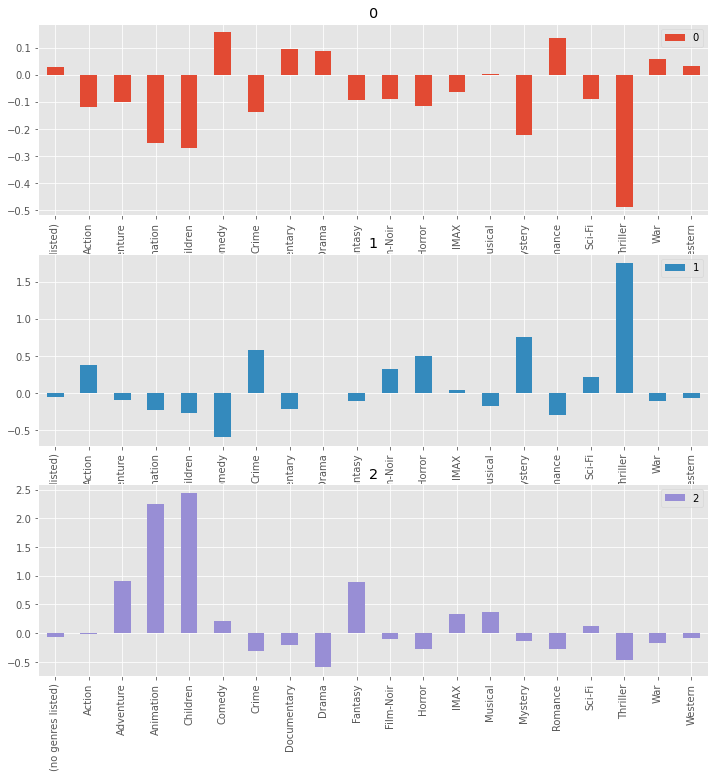

In [0]:
plt.style.use('ggplot')
grupos.transpose().plot.bar(subplots=True,sharex=False,figsize=(12,12))


In [0]:
grupo = 0
filtro = modelo.labels_ == grupo

dados[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1241,1650,Washington Square (1997),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
730,950,"Thin Man, The (1934)",Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9728,190215,Liquid Truth (2017),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2529,3389,Let's Get Harry (1986),Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4828,7206,Mon Oncle (My Uncle) (1958),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9606,176413,Bliss (2012),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1984,2634,"Mummy, The (1959)",Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7015,68269,"Young Victoria, The (2009)",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3590,4921,Little Women (1933),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8878,134109,Radio Day (2008),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_grupos,generos):
  modelo = KMeans(n_clusters=numero_grupos)
  modelo.fit(generos)
  return [numero_grupos,modelo.inertia_]



In [0]:
resultado = [kmeans(numero_grupos,generos_escalados)for numero_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179910.78829016877],
 [3, 166070.99613504743],
 [4, 156086.59034865294],
 [5, 148599.96827340245],
 [6, 137503.87637271942],
 [7, 128233.95475105844],
 [8, 119140.76710797817],
 [9, 109945.28538223771],
 [10, 102728.89231056176],
 [11, 95688.78615415779],
 [12, 88540.14425349559],
 [13, 79263.72740167852],
 [14, 77040.56258551378],
 [15, 71833.5052334281],
 [16, 63608.579491493794],
 [17, 61185.88595502741],
 [18, 59299.03457482448],
 [19, 56618.70181359605],
 [20, 55215.53134106584],
 [21, 53380.544434557625],
 [22, 51757.69546676134],
 [23, 50802.39459158907],
 [24, 49021.22800383662],
 [25, 48886.13693765079],
 [26, 47190.38098204098],
 [27, 46500.28596719074],
 [28, 45083.27022875252],
 [29, 44342.461553968045],
 [30, 43221.26845008457],
 [31, 42187.249160453495],
 [32, 40485.06024067251],
 [33, 40303.00526592331],
 [34, 39615.52789420523],
 [35, 38532.391365096984],
 [36, 38093.40921218122],
 [37, 36933.47319931045],
 [38, 37028.12070968683],
 [39, 36047.11163

In [0]:
resultado = pd.DataFrame(resultado,columns=['N_de_Grupo','Erro'])

resultado

,N_de_Grupo,Erro
0,1,194840.000000
1,2,179910.788290
2,3,166070.996135
3,4,156086.590349
4,5,148599.968273
5,6,137503.876373
6,7,128233.954751
7,8,119140.767108
8,9,109945.285382
9,10,102728.892311


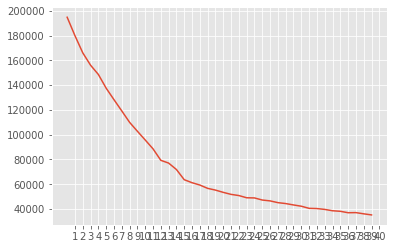

In [0]:
resultado.Erro.plot(xticks=resultado.N_de_Grupo)

In [0]:
from sklearn.cluster import AgglomerativeClustering